# World of Video Games

An online store Ice which sells video games worldwide my goal is to analyze the key factors such as user and expert reviews, game genres, platforms, and ESRB ratings to show potential top performing games and consoles. I will explore historical video game sales data to identify patterns that determine a games success. With the 2016 data as my reference point, i will create a data driven strategy for 2017.   

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [8]:

try:
    df_gaming= pd.read_csv('/datasets/games.csv')
except:
    df_gaming= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

In [9]:
df_gaming

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# Step 2 Prepare the data

In [10]:
df_gaming.columns= df_gaming.columns.str.lower()

In [11]:
df_gaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
df_gaming['user_score'] = pd.to_numeric(df_gaming['user_score'], errors='coerce')

In [13]:
df_gaming['user_score'] = df_gaming['user_score'].astype(float)

In [14]:
# df_gaming['critic_score'].fillna(0, inplace=True)

In [15]:
df_gaming.dropna(subset=['year_of_release'], inplace=True)
df_gaming['year_of_release'] = df_gaming['year_of_release'].astype('int')
df_gaming.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [16]:
# df_gaming['user_score'].fillna(0, inplace=True)


In [17]:
df_gaming['rating'].fillna('Not Rated', inplace=True)
df_gaming = df_gaming.dropna(subset=['name', 'genre'])

C:\Users\kpina\AppData\Local\Temp\ipykernel_3280\2299601053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gaming['rating'].fillna('Not Rated', inplace=True)


In [18]:
df_gaming.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

I performed the essential data preprocessing steps to clean and prepare the dataset for further analysis. The column names were converted to lowercase, the missing values were analyzed. For year_of_release it was initially stored as an object (string), this column was converted to Int64 to ensure numerical operations. For user_score column was originally stored as an object likely due to non-numeric values it was first converted to numeric using pd.to_numeric() with errors='coerce', which replaces non-numeric values (such as "TBD") with NaN than it was converted to float to maintain decimal precision in scoring.

For critic_score and user_score the missing values were filled with 0. this ensures for critic_score the numerical consistency and avoids issues in aggregation as the missing scores might show absence in review rather than an error in the data. For user_score 0 represents an absent rating or placeholder for missing reviews.

For rating the missing values were replaced with 'Not Rated' if the game doesn't show ratings its clear to label it rather than leaving it blank. For name and genre the rows that were missing values were removed. The Missing values likely indicate incomplete or incorrect records. The possible reasons for missing values is due to either lack of data collection, data entry errors, and unreleased TBD titles

"TBD" was converted to NaN, then filled with 0. A game marked as "TBD" means it hasn't been rated yet, so treating it as 0 ensures consistency. 

In [19]:
df_gaming['total_sales']=df_gaming[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_gaming

C:\Users\kpina\AppData\Local\Temp\ipykernel_3280\3953266036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gaming['total_sales']=df_gaming[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not Rated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Not Rated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Not Rated,0.01


I calculated the total sales for each game by summing sales across each region. The sum (axis=1) function ensures the summation is done row wise adding the values for each game

In [20]:
display(df_gaming[(df_gaming['platform'] == 'DS') & (df_gaming['year_of_release'] < 2004)])
df_gaming = df_gaming[~((df_gaming['platform'] == 'DS') & (df_gaming['year_of_release'] < 2004))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Not Rated,0.02


I filtered the data to show only games released on Nintendo DS platform before 2004, I removed all rows where the DS platform release year thats before 2004 using the tilde(~). I removed the entries for df_gaming because DS was offially release in 2004 making those data points incorrect.

In [21]:
gaming_duplicates=df_gaming.duplicated().sum()
gaming_duplicates

0

Ran this code to verify if there were any duplicates and the results were 0

In conclusion the data preprocessing included column names that were standardized to lowercase for consistency, cleaning missing values, converting data types, and ensuring numerical consistency, followed by removing incorrect records (such as pre-2004 DS games) and checking for duplicates, resulting in a refined dataset ready for analysis while preserving data integrity.

# Step 3 Analyze the data

In [22]:
games_per_year= df_gaming['year_of_release'].value_counts().sort_index()

For this function I used values_counts to count how many games were released each year and used sort_index to insure the years are in chronological order for proper visualization.

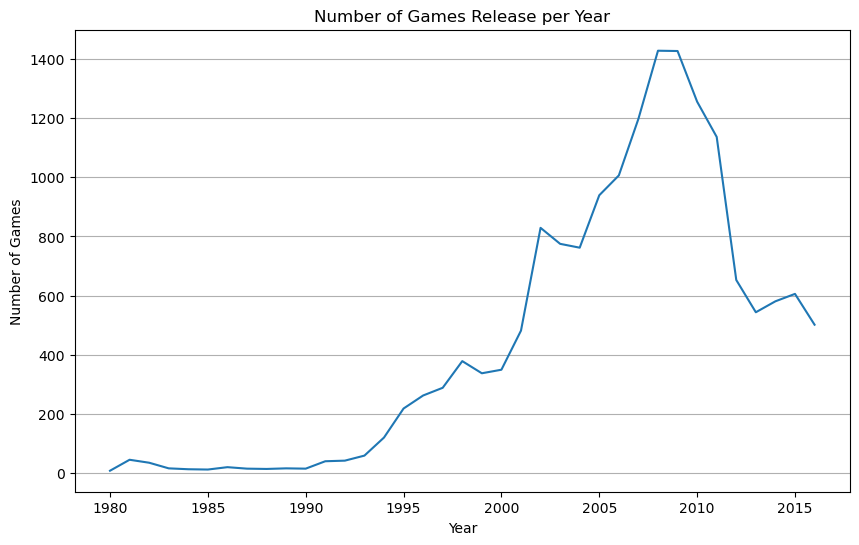

In [23]:
plt.figure(figsize=(10, 6))
games_per_year.plot()
plt.title('Number of Games Release per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(axis='y')
plt.show()

A Line graph was used to visualise the number of video games per year over time. The graph shows the rise and fall of video games releases which shows it peaked around 2008 and decline afterwards.

In [24]:
platform_sales = df_gaming.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: total_sales, dtype: float64

In [25]:
top_platforms= platform_sales.head(5).index
top_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

df_gaming is grouped by the platform column, the total sales for each platform are summed up and the platform are sorted in decending order based on total sales.The goal of this code is to determine the top 5 gaming platform based on totl sales.

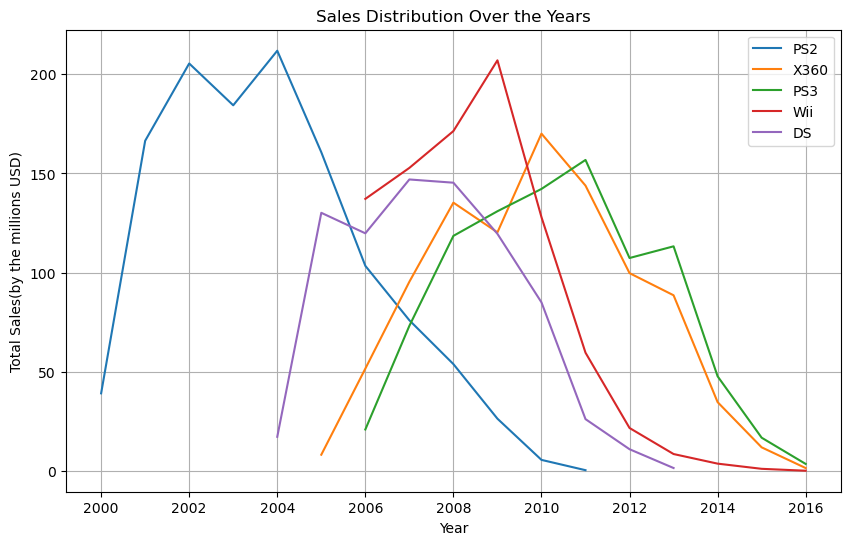

In [26]:
plt.figure(figsize=(10, 6))
for platform in top_platforms:
    #print(platform)
    sales_data = df_gaming[df_gaming['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    # print(sales_data)
    # if not sales_data.empty:
    plt.plot(sales_data.index, sales_data.values, label=platform)
plt.title('Sales Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales(by the millions USD)')
plt.legend()
plt.grid(True)
plt.show()

Most gaming platforms take around 3-5 years to reach peak sales, maintain high sales for 5-8 years, and decline over 3-6 years, resulting in an average lifespan of 10-15 years before becoming obsolete.

In [27]:
recent_years_data = df_gaming[df_gaming['year_of_release'] >= 2014]
recent_years_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Not Rated,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Not Rated,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Not Rated,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not Rated,0.01


df_gaming is filtered to include only games the were release from 2014 or later from 'year_of_release' and the subset was stored in recent_years_data.

In [28]:
platform_totals= recent_years_data.groupby('platform')['total_sales'].sum()
print(platform_totals.sort_values(ascending=False))

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


recent_years_data is grouped by the platform column, the total sales for each platform are summed up and the platform are sorted in ascending order based on total sales.

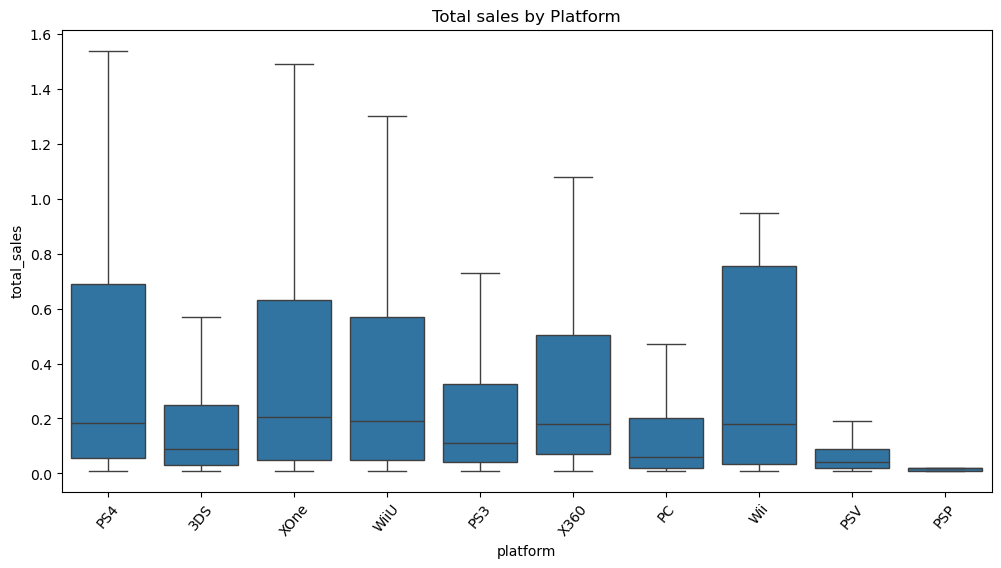

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=recent_years_data, showfliers=False)
# plt.ylim(0,2)
plt.title('Total sales by Platform')
plt.xticks(rotation=50)
plt.show()

A boxplot graph is shown here to help analyze the distribution of total sales across different platforms it shows the median sales which is the centerline in each box, the interquartile range which is the box size. This helps understand the gaming market in 2014. 

In [30]:
platform_score_sales = recent_years_data.copy()
platform_score_sales = platform_score_sales[(platform_score_sales['critic_score'] != 0) & (platform_score_sales['user_score'] != 0)]
platform_score_sales['user_score']= platform_score_sales['user_score'] * 10


For these functions recent_years_data was copied to avoid modifying the original data. the datset if filtered to remove games with missing (0) critic_scores and user_scores. The user_score column is multiplied by 10 because the user_score datasets are stored on a scale from 0-10 while critic_score are 0-100.

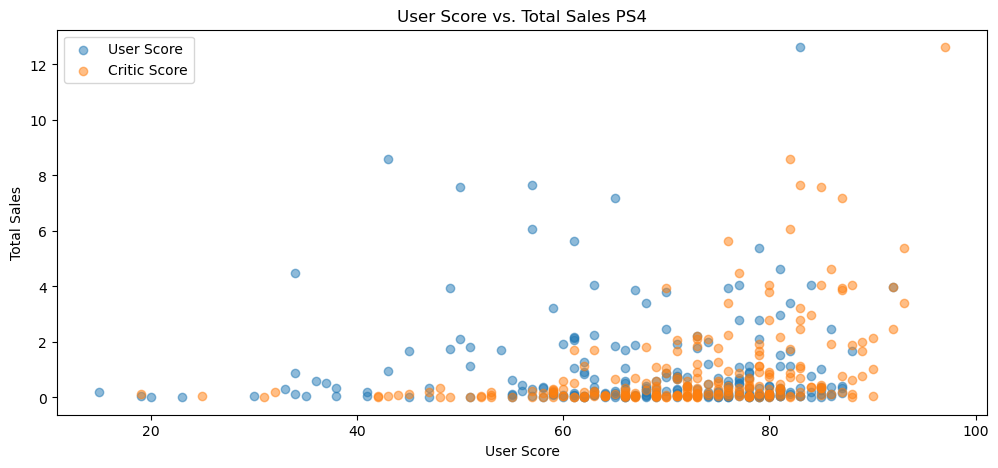

In [31]:
platform= platform_score_sales[platform_score_sales['platform'] == 'PS4']

plt.figure(figsize=(12, 5))

plt.scatter(platform['user_score'], platform['total_sales'], alpha=0.50, label="User Score")
plt.scatter(platform['critic_score'], platform['total_sales'], alpha=0.50, label="Critic Score")
plt.title('User Score vs. Total Sales PS4')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


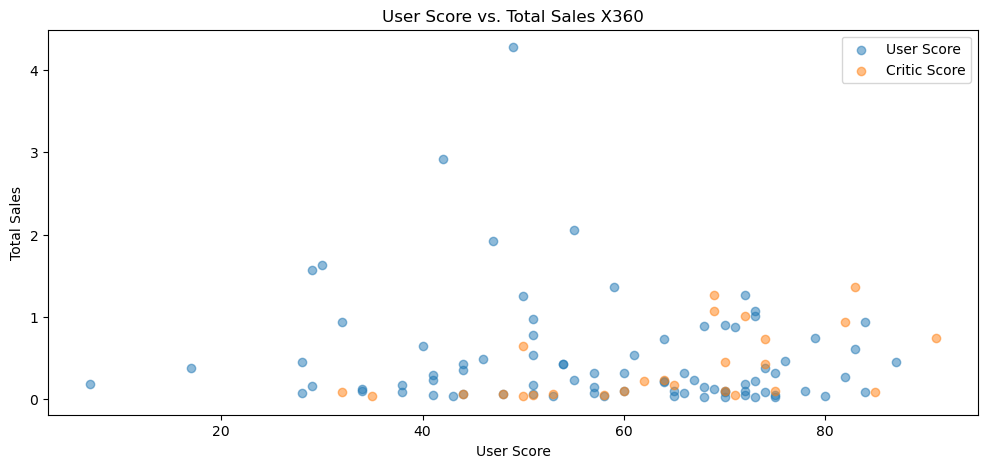

In [32]:
platform= platform_score_sales[platform_score_sales['platform'] == 'X360']

plt.figure(figsize=(12, 5))

plt.scatter(platform['user_score'], platform['total_sales'], alpha=0.50, label="User Score")
plt.scatter(platform['critic_score'], platform['total_sales'], alpha=0.50, label="Critic Score")
plt.title('User Score vs. Total Sales X360')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

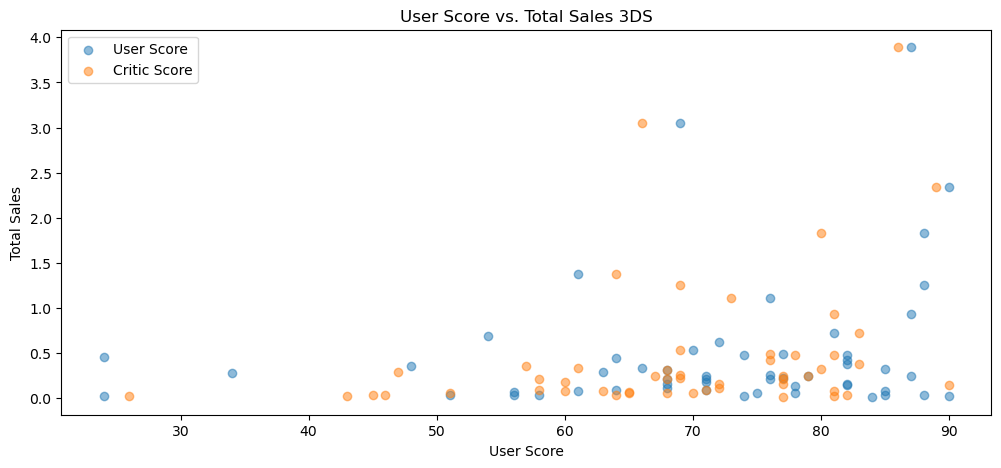

In [33]:
platform= platform_score_sales[platform_score_sales['platform'] == '3DS']

plt.figure(figsize=(12, 5))

plt.scatter(platform['user_score'], platform['total_sales'], alpha=0.50, label="User Score")
plt.scatter(platform['critic_score'], platform['total_sales'], alpha=0.50, label="Critic Score")
plt.title('User Score vs. Total Sales 3DS')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

The scatter plot graph shows the relationship between user_score, critic_score, and total sales from different platforms PS4, X360 and 3DS. The critic_score seems to have more sales on PS4 then X360 and 3DS. User_score has some impact but less correlated with high sales from all three platforms.

In [34]:
game_sales=recent_years_data.groupby('genre')['total_sales'].sum()
game_sales

genre
Action          199.36
Adventure        17.55
Fighting         28.22
Misc             37.55
Platform         18.09
Puzzle            2.21
Racing           27.52
Role-Playing    101.44
Shooter         170.94
Simulation       13.13
Sports          109.48
Strategy          3.96
Name: total_sales, dtype: float64

recent_years_data is grouped by the genre column, the total sales for each platform are summed up.

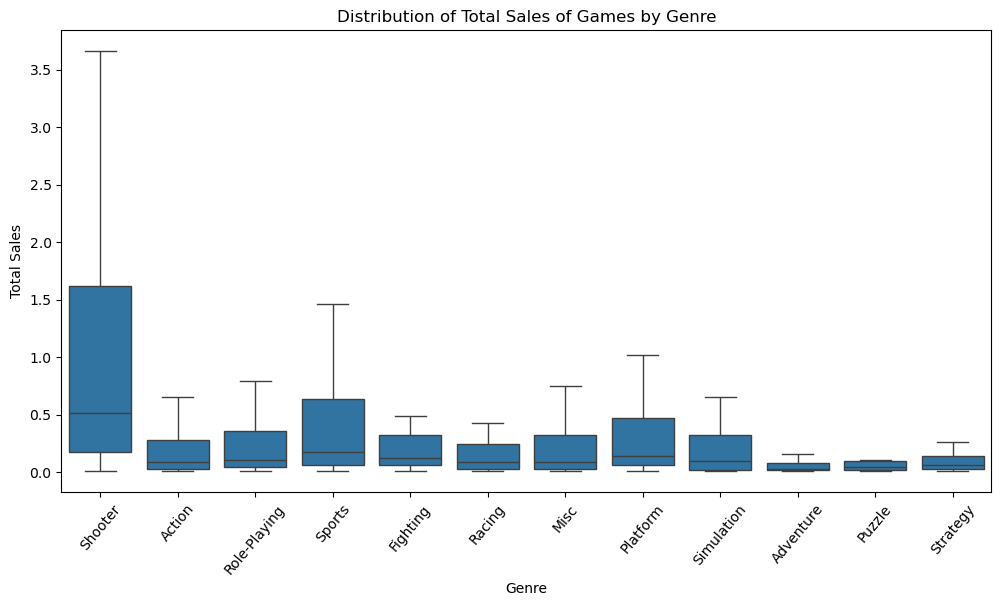

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=recent_years_data, showfliers=False)
plt.title('Distribution of Total Sales of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=50)
plt.show()

A boxplot graph is shown here to help analyze the distribution of total sales of game genres it shows the median sales which is the centerlie in each box, the interquartile range which is the box size. Shooter games are the most successful genre with high sales where action, role playing and sports games have more variability but still produce high selling games. Puzzle, strategy and adventure games have lower sales.

# Step 4 Create a user profile for each region

In [36]:
df_gaming.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not Rated,31.38


In [37]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_platform_sales=recent_years_data.groupby('platform')[region].sum().sort_values(ascending=False).head()
    print(f"Top 5 platforms in {region}:\n{region_platform_sales}\n")

Top 5 platforms in na_sales:
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Top 5 platforms in eu_sales:
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

Top 5 platforms in jp_sales:
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64



This analysis revealed that PS4 dominated sales in North America and Europe, while handheld consoles like the 3DS and PSV were more popular in Japan, highlighting regional gaming preferences where Xbox performed well in the North America markets but struggled in Japan, and PC gaming had a stronger presence in Europe than in other regions.

In [38]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_genre_sales=recent_years_data.groupby('genre')[region].sum().sort_values(ascending=False).head()
    print(f"Top 5 genre in {region}:\n{region_genre_sales}\n")

Top 5 genre in na_sales:
genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

Top 5 genre in eu_sales:
genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

Top 5 genre in jp_sales:
genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64



This analysis revealed that Shooter and Action games were the most popular genres in North America and Europe, while Role-Playing games dominated in Japan, highlighting regional preferences where sports and racing games performed well in the Europe markets, while fighting and miscellaneous genres had a stronger presence in Japan.

In [39]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_rating_sales=recent_years_data.groupby('rating')[region].sum().sort_values(ascending=False).head()
    print(f"Top 5 genre in {region}:\n{region_rating_sales}\n")

Top 5 genre in na_sales:
rating
M            96.42
Not Rated    64.72
E            50.74
T            38.95
E10+         33.23
Name: na_sales, dtype: float64

Top 5 genre in eu_sales:
rating
M            93.44
Not Rated    58.95
E            58.06
T            34.07
E10+         26.16
Name: eu_sales, dtype: float64

Top 5 genre in jp_sales:
rating
Not Rated    56.90
T            14.78
E             8.94
M             8.01
E10+          4.46
Name: jp_sales, dtype: float64



This analysis showed that M-rated games were the top-selling category in North America and Europe, while Japan had the highest sales in unrated and T-rated (Teen) games, indicating that the North America and Europe markets favored mature content, whereas Japan had a stronger preference for family-friendly and teen-rated games.

A for loops was use to iterate throught each region sales(North America, Europe, and Japan) and identify the 5 for gaming platforms, genre, and rating based on the total sales in each region. using the for loop dynamically process and prints the top gaming platform, genres, and ratings making the analysis more efficient.

# Step 5 Test the following hypotheses

Null Hypothesis (H0): The average user ratings of the Xbox One and PC platforms are the same. \
Alternative Hypothesis (H1): The average user ratings of the Xbox One and PC platforms are not the same. 

In [40]:
df_xbox=recent_years_data[recent_years_data['platform'] == 'XOne']['user_score'].dropna()
df_pc=recent_years_data[recent_years_data['platform'] == 'PC']['user_score'].dropna()

alpha= 0.05

results= st.ttest_ind(df_xbox, df_pc)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Reject the null hypothesis: The average ratings are different.")
else:
    print("Fail to reject the null hypothesis: The average ratings are the same.")

p-value: 0.10450507919348416
Fail to reject the null hypothesis: The average ratings are the same.


In [41]:
recent_years_data[recent_years_data['platform'] == 'PC']['user_score']

458      3.9
1530     5.4
1677     NaN
1730     7.9
2303     5.7
        ... 
16509    7.9
16518    1.4
16617    NaN
16631    NaN
16692    7.6
Name: user_score, Length: 151, dtype: float64

Null Hypothesis (H0): Average user ratings for the Action and Sports genres are the same.
Alternative Hypothesis (H1): Average user ratings for the Action and Sports genres are not the same.

In [42]:
df_action = recent_years_data[recent_years_data['genre'] == 'Action']['user_score'].dropna()
df_sports = recent_years_data[recent_years_data['genre'] == 'Sports']['user_score'].dropna()

alpha= 0.05

results= st.ttest_ind(df_action, df_sports)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Reject the null hypothesis: The average ratings are different.")
else:
    print("Fail to reject the null hypothesis: The average ratings are the same.")

p-value: 2.871114798510586e-19
Reject the null hypothesis: The average ratings are different.


The significance level that was reasonable is 0.05 which balance between detecting true differences and avoiding false alarm. The Xbox & PC test failed to reject hypothesis, meaning no significant difference in ratings and the Action & Sports test rejected hypothesis, meaning significant differences exist in ratings.

# Conculsion

The goal of this project was to analyze historical video game sales, user and critic ratings, and platform performance to identify patterns that could be used for strategic decision-making in 2017. The analysis shows clear patterns in platform performance, genre preferences, and regional differences that can guide data-driven decisions for the gaming industry. While hypothesis testing revealed significant distinctions between certain game categories but no major differences in platform user ratings. By focusing on high-performing platforms, leveraging critic reviews, and targeting region-specific trends, businesses can maximize sales and optimize their game development and marketing strategies.